<p style="border: 1px solid #e7692c; border-left: 15px solid #e7692c; padding: 10px; text-align:justify;">
    <strong style="color: #e7692c">Tip.</strong> <a style="color: #000000;" href="https://nbviewer.jupyter.org/github/PacktPublishing/Hands-On-Computer-Vision-with-Tensorflow/blob/master/ch4/ch4_nb5_explore_imagenet_and_its_tiny_version.ipynb" title="View with Jupyter Online">Click here to view this notebook on <code>nbviewer.jupyter.org</code></a>. 
    <br/>These notebooks are better read there, as Github default viewer ignores some of the formatting and interactive content.
    </p>

<table style="font-size: 1em; padding: 0; margin: 0;">
    <tr style="vertical-align: top; padding: 0; margin: 0;background-color: #ffffff">
        <td style="vertical-align: top; padding: 0; margin: 0; padding-right: 15px;">
    <p style="background: #363636; color:#ffffff; text-align:justify; padding: 10px 25px;">
        <strong style="font-size: 1.0em;"><span style="font-size: 1.2em;"><span style="color: #e7692c;">Hands-on</span> Computer Vision with TensorFlow 2</span><br/>by <em>Eliot Andres</em> & <em>Benjamin Planche</em> (Packt Pub.)</strong><br/><br/>
        <strong>> Chapter 4: Influential Classification Tools</strong><br/>
    </p>

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #e7692c;">
    Notebook 5:</small><br/>Exploring ImageNet and Tiny-ImageNet</h1>
<br/>
<p style="border-left: 15px solid #363636; text-align:justify; padding: 0 10px;">
    In this additional notebook, we demonstrate how those interested can acquire <em><strong>ImageNet</em></strong> and its smaller version <em><strong>Tiny-ImageNet</em></strong>, and can set up training pipelines using them. With this notebook, we will also briefly introduce the <code>tf.data</code> API.
</p>
<br/>
<p style="border-left: 15px solid #e7692c; padding: 0 10px; text-align:justify;">
    <strong style="color: #e7692c;">Tip.</strong> The notebooks shared on this git repository illustrate some notions from the book "<em><strong>Hands-on Computer Vision with TensorFlow 2</strong></em>" written by Eliot Andres and Benjamin Planche, published by Packt. If you enjoyed the insights shared here, <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!"><strong>please consider acquiring the book!</strong></a>
<br/><br/>
The book provides further guidance for those eager to learn about computer vision and to harness the power of TensorFlow 2 and Keras to build efficient recognition systems for object detection, segmentation, video processing, smartphone applications, and more.</p>
        </td>
        <td style="vertical-align: top; padding: 0; margin: 0; width: 280px;">
    <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!" target="_blank">
        <img src="../banner_images/book_cover.png" width=280>
    </a>
    <p style="background: #e7692c; color:#ffffff; padding: 10px; text-align:justify;"><strong>Leverage deep learning to create powerful image processing apps with TensorFlow 2 and Keras. <br/></strong>Get the book for more insights!</p>
    <ul style="height: 32px; white-space: nowrap; text-align: center; margin: 0px; padding: 0px; padding-top: 10px;">
    <li style="display: block;height: 100%;float: left;vertical-align: middle;margin: 0 25px 10px;padding: 0px;">
        <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Get the book on Amazon (paperback or Kindle version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_amazon.png" width="75px">
        </a>
    </li>
    <li style="display: inline-block;height: 100%;vertical-align: middle;float: right;margin: -5px 25px 10px;padding: 0px;">
        <a href="https://www.packtpub.com/application-development/hands-computer-vision-tensorflow-2" title="Get your Packt book (paperback, PDF, ePUB, or MOBI version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_packt.png" width="75px">
        </a>
    </li>
    </ul>
        </td>
        </tr>
        </table>

In [1]:
import os
import glob
import tensorflow as tf
from matplotlib import pyplot as plt

## Tiny-ImageNet

### Presentation

As presented in the chapter, the *ImageNet* dataset ([http://image-net.org](http://image-net.org)) and its yearly competition pushed forward the development of performant CNNs for image recognition[$^1$](#ref).
While it could have been interesting to reuse this dataset to reproduce the results listed in the book, its huge size makes _ImageNet_ difficult to deploy on most machines (memory-wise). Training on such a dataset would also be a long, expensive task.

Another solution could have been to use only a portion of _ImageNet_. Indeed, the people at Standford University already compiled such a dataset for one of their famous classes ("_CS231n: Convolutional Neural Networks for Visual Recognition_" - http://cs231n.stanford.edu/). This dataset, _Tiny-ImageNet_ ([https://tiny-imagenet.herokuapp.com](https://tiny-imagenet.herokuapp.com)) contains 200 different classes (against the 1,000 of ImageNet). For each class, it offers 500 training images, 50 validation images, and 50 test ones.

### Setup

Tiny-ImageNet can be downloaded at [https://tiny-imagenet.herokuapp.com](https://tiny-imagenet.herokuapp.com) or [http://image-net.org/download-images](http://image-net.org/download-images) (users need the proper access).

***Note:*** Makee sure to check the _ImageNet_ terms of use: [http://image-net.org/download-faq](http://image-net.org/download-faq).

Once downloaded, the archive can be unzipped (`unzip tiny-imagenet-200.zip`) at a proper location. Its path is stored into a variable:

In [2]:
ROOT_FOLDER = os.path.expanduser('~/datasets/tiny-imagenet-200/')

Let us have a look at the directory structure of the dataset:

    - <ROOT_FOLDER>/tiny-imagenet-200/
       - wnids.txt                 <-- File with the list of class IDs in the dataset
         
       - words.txt                 <-- File with the mapping from class IDs to readable labels
         
       - train/                    <-- Training folder
          - <class_i>/             <--    Folder containing training data of class <class_i> 
             - images/             <--       Sub-folder with all the images for this class
                 - ***.JPEG
             - n01443537_boxes.txt <--    Annotations for detection tasks (unused)
                         
       - val/                      <-- Validation folder
          - images/                <--    Folder with all the validation images
          - val_annotations.txt    <--    File with the list of eval image filenames and
                                          the corresponding class IDs
         
       - test/                     <-- Test folder
          - images/                <--    Folder containing all the test images

Finally, we define some additional dataset-related constants useful for later:

In [3]:
IMAGENET_IDS_FILE_BASENAME = 'wnids.txt' # File in ROOT_FOLDER containing the list of class IDs
IMAGENET_WORDS_FILE_BASENAME = 'words.txt' # File in ROOT_FOLDER containing the mapping from class IDs to readable labels
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 64, 64, 3 # Image dimensions

## Input Pipeline

Datasets come in all forms and sizes. As training a CNN is a complex and heavy process, it is important to have an efficient data pipeline to provide the training batches on time to avoid performance bottlenecks.

In the following section, we will set up an input pipeline for a Tensorflow model, using Tiny-ImageNet as an example.

### Parsing the Labels

_Tiny-ImageNet_ is mainly organized by class. Therefore, let us start by listing and parsing those various classes.

We will use the two text files at the root of _Tiny-ImageNet_ to:
 - List the IDs corresponding to the 200 classes. This list will allow us to assign to each ID (IDs are 9-character-long strings) an integer from 0 to 199 (the ID position in the list);
 - Build a dictionary to map the IDs to human-readable labels (e.g., '_n01443537_' $ \rightarrow$ '_goldfish, Carassius auratus_')

The first list is the most important, as it defines the categories (mapping the string IDs to numbers) which will be the target of our recognition models. The second structure, the dictionary, will simply allow us at the end to get understandable results.

In [4]:
def _get_class_information(ids_file, words_file):
    """
    Extract the class IDs and corresponding human-readable labels from metadata files.
    :param ids_file:        IDs filename (contains list of unique string class IDs)
    :param words_file:      Words filename (contains list of tuples <ID, human-readable label>)
    :return:                List of IDs, Dictionary of labels
    """
    with open(ids_file, "r") as f:
        class_ids = [line[:-1] for line in f.readlines()] # removing the `\n` for each line

    with open(words_file, "r") as f:
        words_lines = f.readlines()
        class_readable_labels = {}
        for line in words_lines:
            # We split the line between the ID (9-char long) and the human readable label:
            class_id = line[:9]
            class_label = line[10:-1]

            # If this class is in our dataset, we add it to our id-to-label dictionary:
            if class_id in class_ids:
                class_readable_labels[class_id] = class_label

    return class_ids, class_readable_labels


We can directly test this function:

In [5]:
ids_file = os.path.join(ROOT_FOLDER, IMAGENET_IDS_FILE_BASENAME)
words_file = os.path.join(ROOT_FOLDER, IMAGENET_WORDS_FILE_BASENAME)
class_ids, class_readable_labels = _get_class_information(ids_file, words_file)


In [6]:
# Let's for example print the 10 first IDs and their human-readable labels:
for i in range(10):
    id = class_ids[i]
    print('"{}" --> "{}"'.format(id, class_readable_labels[id]))


"n02124075" --> "Egyptian cat"
"n04067472" --> "reel"
"n04540053" --> "volleyball"
"n04099969" --> "rocking chair, rocker"
"n07749582" --> "lemon"
"n01641577" --> "bullfrog, Rana catesbeiana"
"n02802426" --> "basketball"
"n09246464" --> "cliff, drop, drop-off"
"n07920052" --> "espresso"
"n03970156" --> "plunger, plumber's helper"


### Listing All Images and Labels

Now that we have the categories defined, we can list all the images along with their respective categorical labels.

Since the dataset structure is different for training/validation/testing splits, we have to cover them separately. This happens often in practice, as defining a normalized structure for datasets is a complicated task (image format, annotation types, folder structure, etc. are heavily affected by the use-cases).

In this example, we will cover only the training and validation split:

In [7]:
def _get_train_image_files_and_labels(root_folder, class_ids):
    """
    Fetch the lists of training images and numerical labels.
    We assume the images are stored as "<root_folder>/train/<class_id>/images/*.JPEG"
    :param root_folder:     Dataset root folder
    :param class_ids:       List of class IDs
    :return:                List of image filenames and List of corresponding labels
    """
    image_files, labels = [], []

    for i in range(len(class_ids)):
        class_id = class_ids[i]
        # Grabbing all the image files for this class:
        class_image_paths = os.path.join(root_folder, 'train', class_id, 'images', '*.JPEG')
        class_images = glob.glob(class_image_paths)
        # Creating as many numerical labels:
        class_labels = [i] * len(class_images)

        image_files += class_images
        labels += class_labels

    return image_files, labels

In [8]:
def _get_val_image_files_and_labels(root_folder, class_ids):
    """
    Fetch the lists of validation images and numerical labels.
    We assume the images are stored as "<root_folder>/train/<class_id>/images/*.JPEG"
    :param root_folder:     Dataset root folder
    :param class_ids:       List of class IDs
    :return:                List of image filenames and List of corresponding labels
    """
    image_files, labels = [], []

    # The file 'val_annotations.txt' contains for each line the image filename and its annotations.
    # We parse it to build our dataset lists:
    val_annotation_file = os.path.join(root_folder, 'val', 'val_annotations.txt')
    with open(val_annotation_file, "r") as f:
        anno_lines = f.readlines()
        for line in anno_lines:
            split_line = line.split('\t')   # Splitting the line to extract the various pieces of info
            if len(split_line) > 1:
                image_file, image_class_id = split_line[0], split_line[1]
                class_num_id = class_ids.index(image_class_id)
                if class_num_id >= 0: # If the label belongs to our dataset, we add them:
                    image_files.append(image_file)
                    labels.append(class_num_id)

    return image_files, labels


If we call the method for the training data, we obtain our list of 500 * 200 = 100,000 images and their labels:

In [9]:
image_files, image_labels = _get_train_image_files_and_labels(ROOT_FOLDER, class_ids)
print("Number of training images: {}".format(len(image_files)))

Number of training images: 100000


### Building an Iterable Dataset with Tensorflow

We need to convert this list of filenames into images, and generate a list of batches our model could iterate over during its training. There are however lots of elements to take into consideration. 

For instance, pre-loading all the images may not be possible for modest machines (at least for bigger datasets); but loading images on the fly would cause continuous delays. Also, in several papers we presented in Chapter 4, data scientists are applying random transformations to the images at each iteration (cropping, scaling, etc.). Those operations are also consuming.

All in all, we would probably need some multi-thread pipeline for our inputs. Thankfully, Tensorflow provides us with an efficient solution. Its **`tf.data`** API contains several methods to build **`tf.data.Dataset()`** instances, a dataset structure which can be converted into batch iterators for TF models.

***Note:*** The `tf.data` API is thoroughfully detailed later in Chapter [7](./ch7).

For instance, a `Dataset` can be created from tensors containing lists of elements. Therefore, we can easily wrap our `image_files` and `image_labels` into a `Dataset`, first converting them into tensors: 

In [10]:
image_files = tf.constant(image_files)
image_labels = tf.constant(image_labels)
dataset = tf.data.Dataset.from_tensor_slices((image_files, image_labels))
dataset


<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

This object has multiple methods to transform its content, batch the elements, shuffle them, etc. Once defined, those operations will be applied only when necessary / called by the framework (like any other operation in TF graphs).

Our goal is to have this dataset output batches of images and their labels. So first thing first, let us add an operation to obtain the images from the filenames:


In [11]:
def _parse_function(filename, label, size=[IMG_HEIGHT, IMG_WIDTH]):
    """
    Parse the provided tensors, loading and resizing the corresponding image.
    Code snippet from https://www.tensorflow.org/guide/datasets#decoding_image_data_and_resizing_it (Apache 2.0 License).
    :param filename:    Image filename (String Tensor)
    :param label:       Image label
    :param size:        Size to resize the images to
    :return:            Image, Label
    """
    # Reading the file and returning its content as bytes:
    image_string = tf.io.read_file(filename)
    # Decoding those into the image
    # (with `channels=3`, TF will duplicate the channels of grayscale images so they have 3 channels too):
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)
    # Converting to float:
    image_float = tf.image.convert_image_dtype(image_decoded, tf.float32)
    # Resizing the image to the expected dimensions:
    image_resized = tf.image.resize(image_float, size)
    return image_resized, label

dataset = dataset.map(_parse_function)



`dataset.map(fn)` tells the dataset to apply the function `fn` to each element requested at a given iteration. These functions can be chained. For example, we can add another function to randomly transform the training images, to artificially increase the number of different images our model can train on:

In [12]:
def _training_augmentation_fn(image, label):
    """
    Apply random transformations to augment the training images.
    :param images:      Images
    :param label:       Labels
    :return:            Augmented Images, Labels
    """

    # Randomly applied horizontal flip:
    image = tf.image.random_flip_left_right(image)

    # Random B/S changes:
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.clip_by_value(image, 0.0, 1.0) # keeping pixel values in check

    # Random resize and random crop back to expected size:
    original_shape = tf.shape(image)
    random_scale_factor = tf.random.uniform([1], minval=0.7, maxval=1.3, dtype=tf.float32)
    scaled_height = tf.cast(tf.cast(original_shape[0], tf.float32) * random_scale_factor, 
                            tf.int32)
    scaled_width = tf.cast(tf.cast(original_shape[1], tf.float32) * random_scale_factor, 
                           tf.int32)
    scaled_shape = tf.squeeze(tf.stack([scaled_height, scaled_width]))
    image = tf.image.resize(image, scaled_shape)
    image = tf.image.random_crop(image, original_shape)

    return image, label

dataset.map(_training_augmentation_fn)


<MapDataset shapes: ((64, 64, 3), ()), types: (tf.float32, tf.int32)>

We can also specify if we want the dataset to be suffled, or sepcify how many elements we want at each iteration in a batch, how many times we want the dataset to be repeated (for multiple epochs), how many batches to pre-fetch, etc:


In [13]:
batch_size = 32
num_epochs = 30

dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat(num_epochs)
dataset = dataset.prefetch(1)


***Note:*** More detailed explanations on `Dataset` and its methods, as well as performance recommendations, will be provided in Chapter 7 and its [notebooks](../ch7).

Our dataset is ready, and we can now simply iterate over it to obtain our batches:

In [14]:
images, labels = next(dataset.__iter__())

organ, pipe organ


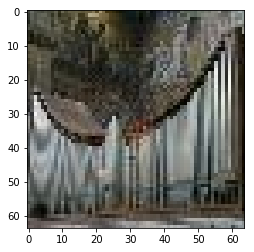

In [15]:
# Displaying an example:
i = 0
class_id = class_ids[labels[i]]
readable_label = class_readable_labels[class_id]
print(readable_label)
plt.imshow(images[i])


As we saw through the previous notebooks, this `tf.data.Dataset` instances can be simply passed to Keras models for their training.


### Wrapping Up for Estimators

If we want to pass our dataset to an Estimator, we can wrap the iterable inputs (`images` here) into a dictionary in order to name the content.


In [16]:
batch = {'image': images, 'label': labels}

We know have our input pipeline ready. We will reuse these variables in the next notebooks. For clarity, we wrap their definition into easy-to-call functions:

In [ ]:
def _input_fn(image_files, image_labels,
              shuffle=True, batch_size=32, num_epochs=None,
              augmentation_fn=None, wrap_for_estimator=True, resize_to=None):
    """
    Prepares and returns the iterators for a dataset.
    :param image_files:         List of image files
    :param image_labels:        List of image labels
    :param shuffle:             Flag to shuffle the dataset (if True)
    :param batch_size:          Batch size
    :param num_epochs:          Number of epochs (to repeat the iteration - infinite if None)
    :param augmentation_fn:     opt. Augmentation function
    :param wrap_for_estimator:  Flag to wrap the inputs to be passed for Estimators
    :param resize_to:           (opt) Dimensions (h x w) to resize the images to
    :return:                    Iterable batched images and labels
    """

    # Converting to TF dataset:
    image_files = tf.constant(image_files)
    image_labels = tf.constant(image_labels)
    dataset = tf.data.Dataset.from_tensor_slices((image_files, image_labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=50000)
    # Adding parsing operation, to open and decode images:
    if resize_to is None:
        parse_fn = _parse_function
    else:
        # We specify to which dimensions to resize the images, if requested:
        parse_fn = partial(_parse_function, size=resize_to)
    dataset = dataset.map(parse_fn, num_parallel_calls=4)
    # Opt. adding some further transformations:
    if augmentation_fn is not None:
        dataset.map(augmentation_fn, num_parallel_calls=4)
    # Further preparing for iterating on:
    dataset = dataset.batch(batch_size)
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.prefetch(1)
    if wrap_for_estimator:
        dataset = dataset.map(lambda img, label: {'image': img, 'label': label})
    return dataset


def tiny_imagenet(phase='train', shuffle=True, batch_size=32, num_epochs=None,
                  augmentation_fn=_training_augmentation_fn, wrap_for_estimator=True,
                  root_folder=ROOT_FOLDER, resize_to=None):
    """
    Instantiate a Tiny-Image training or validation dataset, which can be passed to any model.
    :param phase:               Phase ('train' or 'val')
    :param shuffle:             Flag to shuffle the dataset (if True)
    :param batch_size:          Batch size
    :param num_epochs:          Number of epochs (to repeat the iteration - infinite if None)
    :param augmentation_fn:     opt. Augmentation function
    :param wrap_for_estimator:  Flag to wrap the inputs to be passed for Estimators
    :param root_folder:         Dataset root folder
    :param resize_to:           (opt) Dimensions (h x w) to resize the images to
    :return:                    Dataset pipeline, IDs List, Dictionary to read labels
    """

    ids_file = os.path.join(root_folder, IMAGENET_IDS_FILE_BASENAME)
    words_file = os.path.join(root_folder, IMAGENET_WORDS_FILE_BASENAME)
    class_ids, class_readable_labels = _get_class_information(ids_file, words_file)
    if phase == 'train':
        image_files, image_labels = _get_train_image_files_and_labels(root_folder, class_ids)
    elif phase == 'val':
        image_files, image_labels = _get_val_image_files_and_labels(root_folder, class_ids)
    else:
        raise ValueError("Unknown phase ('train' or 'val' only)")

    dataset = _input_fn(image_files, image_labels,
                               shuffle, batch_size, num_epochs, augmentation_fn,
                               wrap_for_estimator, resize_to)

    return dataset, class_ids, class_readable_labels

## ImageNet

For our more ambitious readers, the same process can be followed with the original *ImageNet* dataset, after acquiring it from its website ([http://image-net.org](http://image-net.org)).

However, TensorFlow developers have made public the `tensorflow-datasets` package ([https://github.com/tensorflow/datasets](https://github.com/tensorflow/datasets)), which greatly simplifies the download and usage of many standard datasets (it is still up to the users to make sure they have the proper authorizations / they respect the terms of use for the datasets they download this way).

We will not extend further in this notebook, as `tensorflow-datasets` has been already properly introduced in a previous [notebook](./ch4_nb1_implement_resnet_from_scratch.ipynb). The explanations shared there can be directly applied to the _ImageNet_ version provided by these package ([details](https://github.com/tensorflow/datasets/blob/master/docs/datasets.md#imagenet2012)):

In [2]:
# !pip install tensorflow-datasets # Uncomment to install the module
import tensorflow_datasets as tfds

imagenet_builder = tfds.builder("imagenet2012")
print(imagenet_builder.info)

# Uncommment to download and get started (check terms of use!):
# imagenet_builder.download_and_prepare()

tfds.core.DatasetInfo(
    name='imagenet2012',
    version=2.0.1,
    description='ILSVRC 2012, aka ImageNet is an image dataset organized according to the
WordNet hierarchy. Each meaningful concept in WordNet, possibly described by
multiple words or word phrases, is called a "synonym set" or "synset". There are
more than 100,000 synsets in WordNet, majority of them are nouns (80,000+). In
ImageNet, we aim to provide on average 1000 images to illustrate each synset.
Images of each concept are quality-controlled and human-annotated. In its
completion, we hope ImageNet will offer tens of millions of cleanly sorted
images for most of the concepts in the WordNet hierarchy.
',
    urls=['http://image-net.org/'],
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string, encoder=None),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=1000)
    },
    total_num_examples=1331167,
    splits={

<a id="ref"></a>
#### References

1. Russakovsky, O., Deng, J., Su, H., Krause, J., Satheesh, S., Ma, S., Huang, Z., Karpathy, A., Khosla, A., Bernstein, M., Berg, A.C., Fei-Fei, L., 2014. ImageNet Large Scale Visual Recognition Challenge. arXiv:1409.0575 [cs].